# Lecture 8 - Experimental Design, Cross-Validation & Regularization

<div class="alert alert-info">
    <b>Experimental Design - How to use your data without cheating</b> 

In experimental design we need data to train (learn) models, and to test how good the models are. The training data needs to be different (disjoint) from the test data. Otherwise we would be testing the learned model on data it had previously seen, and we would get a biased estimate of the model's generalized performance.
    
Most machine learning algorithms require choosing parameter values; very often this is done by setting aside some of the training data to evaluate the quality of different parameter settings.
</div>

Typically we split the **training data** into three disjoint sets:
* **Training set**, 80\% - set of samples (and its labels) used to estimate the parameter values of the model
* **Validation set** - set of samples (and its labels) used for exploring and picking best parameter values
* **Test set**, typically 20\% - set of samples (and its labels) used for testing the model generalization performance, and testing hypotheses

1. The key thing to remember when planning experiments is that the test data is used to form conclusions but not to make decisions during model building. Basing decisions on test data results is frequently called *cheating* in the machine learning community, and often results in wrong conclusions.

2. Our generalization performance is only as good as our test set is representative of the true test data in application.

3. After all parameter value decisions have been made, we often use **ALL** training data for the final training of the system and deployment.

4. The training and validation sets may be rotated by using **cross-validation**.

We cannot rely on one training run of the algorithm:
* Variations in training/validation sets
* random factors during training (e.g., random initialization, local optima, etc.)

<div class="alert alert-info">
    <b>No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. Some examples are: error rate, accuracy, ROC curves, performance-recall curves, etc.. But it can also be in terms of:
* Risk,
* Running time,
* Training time and storage/memory,
* Testing time and storage/memory,
* Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
* computational complexity.

## Factors, Response, and Strategy of Experimentation

As in other branches of science and engineering, in machine learning too, we do experiments to get information about the process under scrutiny.

Our goal is to plan and conduct machine learning experiments and analyze the data resulting from the experiments, to be able to eliminate the effect of chance and obtain conclusions which we can consider *statistically significant*.

The output of a trained learning system depends on:
* **Controllable parameters:** hyper-parameters/settings of the algorithm/algorithm design choices

* **Uncontrollable parameters:** noise in data, any randomness in the training data

### Strategies of Experimentation

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

There are several *strategies of experimentation*:

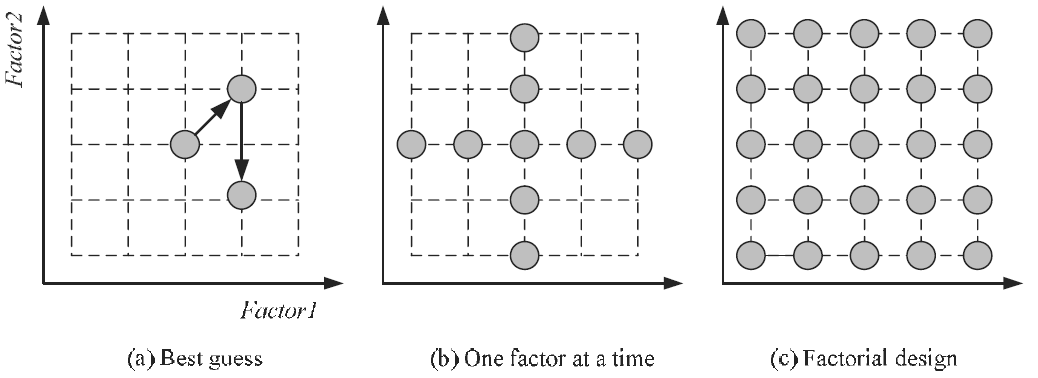

In [1]:
from IPython.display import Image
Image('figures/Experimentation.png',width=800)

* Best guess
* One factor at a time
* Full/Partial Factorial design

### Principles of Experimental Design: Randomization, Replication, and Blocking

* **Randomization:** requires that the order in which the runs are carried out should be randomly determined so that the results are independent. For example, machines require some time to warm up until they operate in their normal range so tests should be done in random order for time not to bias the results.

* **Replication:** for the same configuration of (controllable) factors, the experiment should be run a number of times to average over the effect of uncontrollable factors and induced randomization. In machine learning, this is typically done by running the same algorithm on a number of resampled versions of the same dataset; this is known as **cross-validation**, which we will discuss soon.

* **Blocking:** is used to reduce or eliminate the variability due to nuisance factors that influence the response but in which we are not interested. For example, defects produced in a factory may also depend on the different batches of raw material, and this effect should be isolated from the controllable factors in the factory, such as the equipment, personnel, and so on. In ML experimentation, when we use resampling and use different subsets of the data for different replicates, we need to make sure that for example if we are comparing learning algorithms, they should all use the same set of resampled subsets.

### Guidelines for ML Experiments

Before we start experimentation, we need to have a good idea about what it is we are studying, how the data is to be collected, and how we are planning to analyze it.

1. Understand the goal of the study
2. Determine your evaluation metric(s)
3. Determine what factors to vary and how to vary them
4. Design your experiment (and get an estimate of how long it will take using a couple trial runs)
5. Perform the experiment
6. Analyze the result by performing statistical analysis
7. Draw your conclusions based on your design and result

# Cross-Validation

<div class="alert alert-info">
    <b>$k$-fold Cross-Validation</b> 

The goal of **cross-validation** is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like *overfitting* or *selection bias* and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

The technique of **$k$-fold cross-validation**, illustrated below for the case of $k = 4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the S runs are then averaged.
</div>

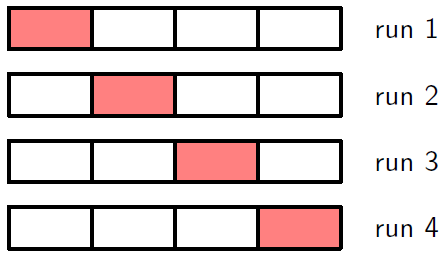

In [2]:
Image('figures/Kfold CV.png',width=400)

In [4]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [5]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M)]).T
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = t-y
    return w, y, error

def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M)]).T 
    y = X@w
    return y

def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N)
    t = np.sin(2*np.pi*x) + noise
    return x, t

Ntrain, Ntest = 100, 30
a, b = [0,1] 
sigma_train, sigma_test = 0.5, 1
x_train, t_train = NoisySinusoidalData(Ntrain, a, b, sigma_train)    # training data and labels
x_true, t_true = NoisySinusoidalData(Ntrain, a, b, 0)             #true sine function
x_test, t_test = NoisySinusoidalData(Ntest, a, b, sigma_test) # test data and labels

# Regularization

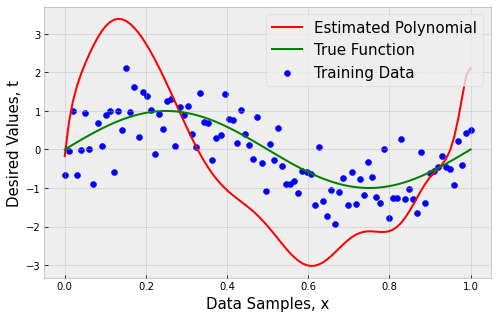

In [6]:
# Model Order
M = 17

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x_train,t_train,M) 

plt.figure(figsize=(8,5))
plt.scatter(x_train,t_train, c='b', label='Training Data')
plt.plot(x_train,y,'r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, x',size=15)
plt.ylabel('Desired Values, t',size=15);

How do the weights look like?

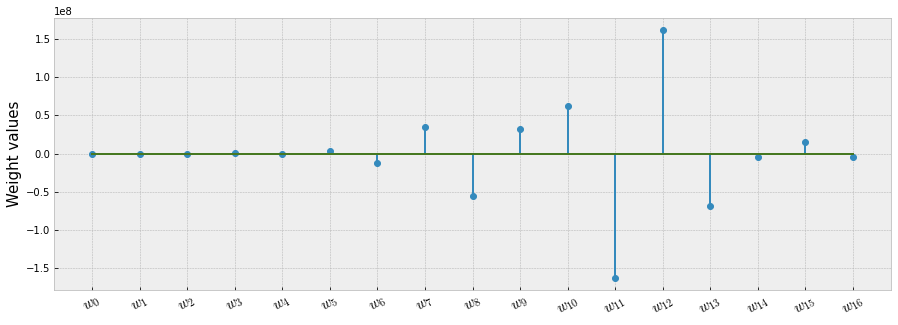

In [7]:
plt.figure(figsize=(15,5))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in range(len(w))],
           rotation=30,fontsize=15);

As the model order increases, some of the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ regulates the model *complexity*.
    * In a Polynomial regresssion it also controls the richness of the feature space.
    * Remember, **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is *complex*, it is more likely to *overfit* or *overtrain*.
* This essentially means it may "memorize" the input training data,
* Including all of the training data's noise!

## Adding a Weight Penalty or *Regularizer*

Suppose you have $N$ data points and you are trying to estimate $M$ coefficients. In other words, you are solving a set of $N$ equations with $M$ variables. We computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, we know that the result $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>